In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#path for data
daily_master_path = 'Resources/daily_returns_master.csv'
daily_stats_path = 'Resources/average_daily_statistics.csv'
yearly_stats_path = 'Resources/average_yearly_statistics.csv'
yearly_master_path = 'Resources/yearly_returns_master.csv'
kaggle_clean_path = 'Resources/kaggle_clean.csv'
#load data into pandas
daily_master_df = pd.read_csv(daily_master_path)
daily_stats_df = pd.read_csv(daily_stats_path)
yearly_stats_df = pd.read_csv(yearly_stats_path)
yearly_master_df = pd.read_csv(yearly_master_path)
kaggle_clean_df = pd.read_csv(kaggle_clean_path)

In [3]:
#Generate symbol list for each classification
symbols = daily_master_df['symbol'].unique()
ai_symbols = kaggle_clean_df['symbol'].unique()
index_symbols = np.array([sym for sym in symbols if sym not in ai_symbols])

In [4]:
daily_master_df[daily_master_df['symbol'].eq('DOW')][['daily_return']]

,daily_return
4792,NaN
4793,-0.016466
4794,-0.007758
4795,0.011317
4796,-0.006104
...,...
6094,-0.005571
6095,-0.022237
6096,-0.011806
6097,0.014758


In [5]:
#segment dataframes for each box plot
# daily_master_df has all
ai_daily = daily_master_df[daily_master_df['symbol'].isin(ai_symbols)]
index_daily = daily_master_df[daily_master_df['symbol'].isin(index_symbols)]
index_daily.shape


(3921, 8)

# Make boxplot for all years

In [6]:
# make a list of daily returns for all ai companies - undifferentiated
ai_companies_daily_returns = ai_daily[['daily_return']]
ai_companies_daily_returns['symbol'] = 'AI companies'
# make a list of df that contain each index ETFs
# List comprehenstion selects all columns for a given symbol in index_symbols,
#   Then selects only the daily_return column as a pandas series
            #first draft attempt before turning into list comprehension
            # box_plot_list = []
            # for sym in index_symbols:
            #     temp_df = index_daily[index_daily['symbol'].eq(sym)]['daily_return']
            #     box_plot_list.append(temp_df)
box_plot_list = [index_daily[index_daily['symbol'].eq(sym)]['daily_return'] for sym in index_symbols]
# Add ai companies in general to list to make box plot
box_plot_list.append(ai_companies_daily_returns['daily_return'])
#make a list of labels in the same order as the box plot data
box_plot_labels = np.append(index_symbols, 'AI companies')
#drop NA (first row in each stock) as boxplot does not handle na values gracefully
for data in box_plot_list:
    data.dropna(inplace=True)
    print(type(data))
    print(data.shape)

<class 'pandas.core.series.Series'>
(1306,)
<class 'pandas.core.series.Series'>
(1306,)
<class 'pandas.core.series.Series'>
(1306,)
<class 'pandas.core.series.Series'>
(12098,)


/tmp/ipykernel_33125/2741727380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_companies_daily_returns['symbol'] = 'AI companies'
/tmp/ipykernel_33125/2741727380.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Text(0, 0.5, 'Daily Returns (USD)')

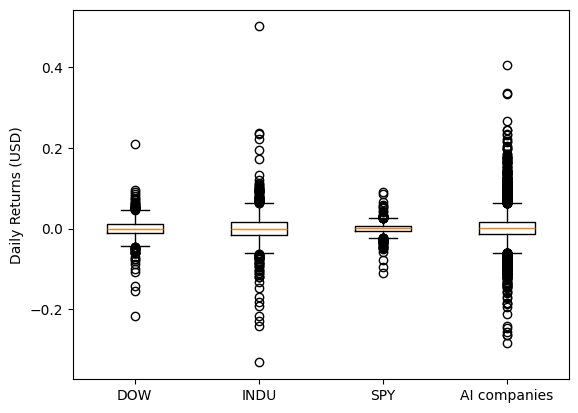

In [7]:
box_plot, ax = plt.subplots()
ax.boxplot(box_plot_list, tick_labels=box_plot_labels)
ax.set_ylabel('Daily Returns (USD)')

# Make boxplots grouped by year

In [8]:
#Generate a yea column to group by
ai_daily['date'] = pd.to_datetime(ai_daily['date'])
ai_daily['year'] = ai_daily['date'].dt.year

#process the ai data by year to generate a list of daily returns for each year.
ai_comps_dr_grouped_year = ai_daily.groupby('year')
grp_name_yrs = ai_comps_dr_grouped_year.groups.keys()
years_titles = list(grp_name_yrs)
years_data_ai = []
for year in years_titles:
    temp_df = ai_comps_dr_grouped_year.get_group(year)
    years_data_ai.append(temp_df)

/tmp/ipykernel_33125/2654169716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_daily['date'] = pd.to_datetime(ai_daily['date'])
/tmp/ipykernel_33125/2654169716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_daily['year'] = ai_daily['date'].dt.year


In [9]:
#Generate a yea column to group by
index_daily['date'] = pd.to_datetime(index_daily['date'])
index_daily['year'] = index_daily['date'].dt.year
print(index_daily.shape)

#process the ai data by year to generate a list of daily returns for each year.
index_dr_grouped_year_sym = index_daily.groupby(['year', 'symbol'])
idx_grp_names = index_dr_grouped_year_sym.groups.keys()
year_sym_titles = list(idx_grp_names)
year_sym_titles

(3921, 9)


/tmp/ipykernel_33125/2215776807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_daily['date'] = pd.to_datetime(index_daily['date'])
/tmp/ipykernel_33125/2215776807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_daily['year'] = index_daily['date'].dt.year


[(2019, 'DOW'),
 (2019, 'INDU'),
 (2019, 'SPY'),
 (2020, 'DOW'),
 (2020, 'INDU'),
 (2020, 'SPY'),
 (2021, 'DOW'),
 (2021, 'INDU'),
 (2021, 'SPY'),
 (2022, 'DOW'),
 (2022, 'INDU'),
 (2022, 'SPY'),
 (2023, 'DOW'),
 (2023, 'INDU'),
 (2023, 'SPY'),
 (2024, 'DOW'),
 (2024, 'INDU'),
 (2024, 'SPY')]

In [10]:
#collect each index ETF data grouped by years into seperate lists
years_data_SPY = []
years_data_DOW = []
years_data_INDU = []

for label in year_sym_titles:
    # temp_df = ai_comps_dr_grouped_year.get_group(year)
    # years_data_ai.append(temp_df)
    temp_df = index_dr_grouped_year_sym.get_group(label)
    temp_df.dropna(inplace=True)
    if 'SPY' in label:
        years_data_SPY.append(temp_df)
    elif 'DOW' in label:
        years_data_DOW.append(temp_df)
    elif 'INDU' in label:
        years_data_INDU.append(temp_df)



/tmp/ipykernel_33125/2649125896.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.dropna(inplace=True)


In [14]:
years_titles
box_plot_labels

array(['DOW', 'INDU', 'SPY', 'AI companies'], dtype='<U12')

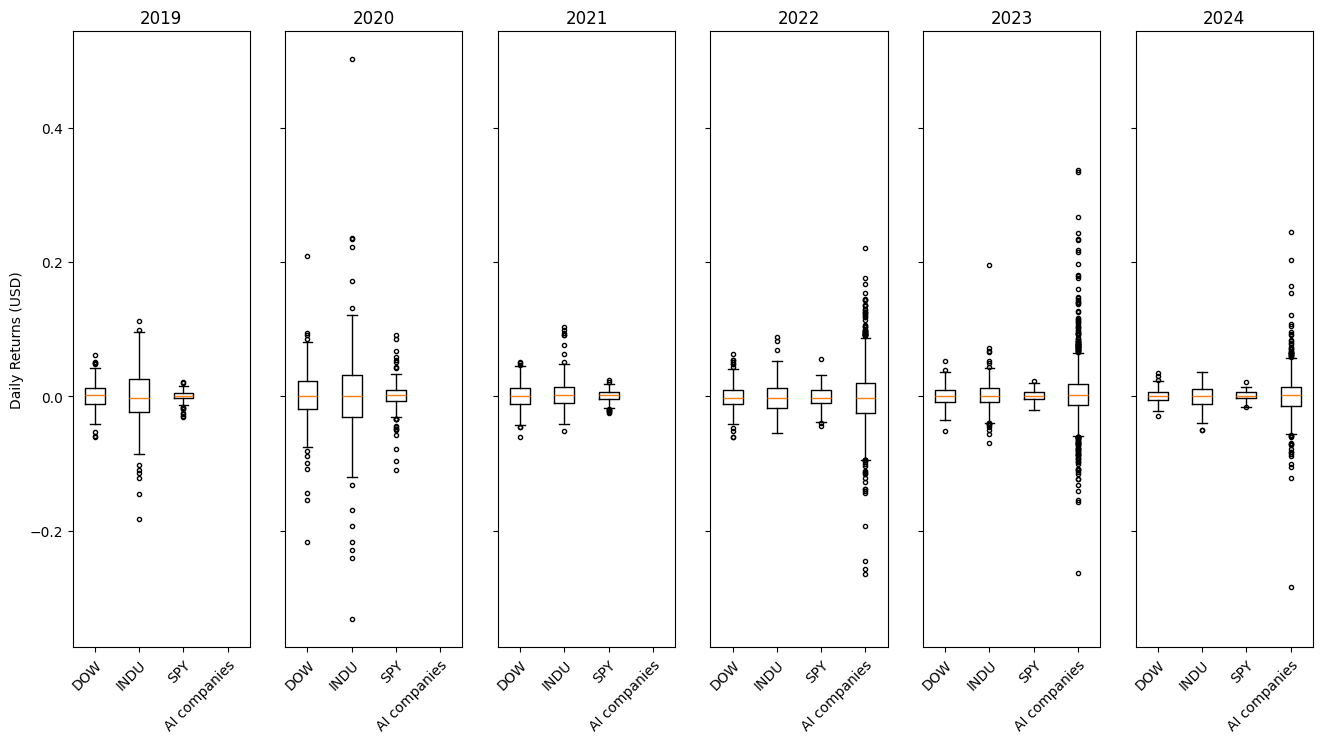

In [13]:
box_plots, axs = plt.subplots(nrows= 1, ncols= 6, sharey= True, figsize=(16,8))
#iterate across horizontally to make the plots
axs[0].set_title('box plots per year')
axs[0].set_ylabel('Daily Returns (USD)')

flier_style = dict(marker='o', markersize=3, color='black')

for year_index in [0, 1 , 2, 3, 4, 5]:
    #correct figure index to 
    #year_index += 1
    # call this years data from the aggregate lists
    this_year_spy = years_data_SPY[year_index]['daily_return']
    this_year_dow = years_data_DOW[year_index]['daily_return']
    this_year_indu = years_data_INDU[year_index]['daily_return']
    this_year_ai = years_data_ai[year_index]['daily_return']
    #add this years data into a single list
    box_data_this_year = [this_year_dow, this_year_indu, this_year_spy, this_year_ai]
    #generate this year's boxplot
    axs[year_index].boxplot(box_data_this_year, flierprops=flier_style)
    axs[year_index].set_xticks([1,2,3,4], 
                               labels=box_plot_labels, 
                               rotation= 45, 
                               rotation_mode='anchor', 
                               ha='right')
    axs[year_index].set_title(years_titles[year_index])
    

